In [86]:
import pandas as pd
import unicodedata
import numpy as np
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,recall_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold


In [24]:
df = pd.read_excel("Ar-Fa.xlsx")

In [25]:
df.columns = ["sentences", "lang"]

In [26]:
df

,sentences,lang
0,هل يتسبب شداد في تعطيل مشاركة المريخ عربيا,عربی
1,اتحاد الطائرة يرفض الاستقالة,عربی
2,ادوات تجميل للرجال تشجعهم للتشبه بالنساء,عربی
3,الاتحاد الرياضي يرسل برنامج الدوري العام,عربی
4,الارباب يغادر الاسماعيلية الى جده في مهمة خاصة,عربی
...,...,...
95,استیلای عرب‌ها به آسیای میانه دگرگونی‌های زیاد...,فارسی
96,هم‌اکنون در کشور تاجیکستان رسماً از خط سیریلیک...,فارسی
97,قبل از انقلاب روسیه خط مردم تاجیکستان پارسی بود,فارسی
98,حرف آ در اسپانیایی در تمام کلمات بدون تغییری ب...,فارسی


In [27]:
Letters = []
df_alfabet = pd.read_csv("alfabet.csv")
columns = df_alfabet["alfabet"].values


def grepLetter(sentence):
    for letter in sentence:
        if letter in Letters:
            continue
        else:
            Letters.append(letter)


In [28]:
alfabet_count = []
for key, line in enumerate(df.sentences):
    sentence = [word for word in df.sentences[key] if unicodedata.normalize('NFKD', word).replace('\u200c', ' ') != " "]
    dict = {}
    for letter in columns:
        dict[letter] = sum(1 if letter == x else 0 for x in sentence)
    alfabet_count.append(dict)
    # print(sentence)

In [108]:
# [word for word in df.sentences[99] if unicodedata.normalize('NFKD', word).replace('\u200c', ' ') != " "]

In [30]:
pd.DataFrame(Letters).to_csv("alfabet.csv", index=False)

In [31]:
columns = df_alfabet["alfabet"].values

In [32]:
len(columns)

46

In [33]:
alfabet_count

[{'ء': 0,
  'آ': 0,
  'أ': 0,
  'ؤ': 0,
  'إ': 0,
  'ئ': 0,
  'ا': 4,
  'ب': 3,
  'ة': 1,
  'ت': 2,
  'ث': 0,
  'ج': 0,
  'ح': 0,
  'خ': 1,
  'د': 2,
  'ذ': 0,
  'ر': 3,
  'ز': 0,
  'س': 1,
  'ش': 2,
  'ص': 0,
  'ض': 0,
  'ط': 1,
  'ظ': 0,
  'ع': 2,
  'غ': 0,
  'ف': 1,
  'ق': 0,
  'ك': 1,
  'ل': 3,
  'م': 2,
  'ن': 0,
  'ه': 1,
  'و': 0,
  'ى': 0,
  'ي': 5,
  'ً': 0,
  'َ': 0,
  'ّ': 0,
  'ٔ': 0,
  'پ': 0,
  'چ': 0,
  'ژ': 0,
  'ک': 0,
  'گ': 0,
  'ی': 0},
 {'ء': 0,
  'آ': 0,
  'أ': 0,
  'ؤ': 0,
  'إ': 0,
  'ئ': 1,
  'ا': 7,
  'ب': 0,
  'ة': 2,
  'ت': 2,
  'ث': 0,
  'ج': 0,
  'ح': 1,
  'خ': 0,
  'د': 1,
  'ذ': 0,
  'ر': 2,
  'ز': 0,
  'س': 1,
  'ش': 0,
  'ص': 0,
  'ض': 1,
  'ط': 1,
  'ظ': 0,
  'ع': 0,
  'غ': 0,
  'ف': 1,
  'ق': 1,
  'ك': 0,
  'ل': 3,
  'م': 0,
  'ن': 0,
  'ه': 0,
  'و': 0,
  'ى': 0,
  'ي': 1,
  'ً': 0,
  'َ': 0,
  'ّ': 0,
  'ٔ': 0,
  'پ': 0,
  'چ': 0,
  'ژ': 0,
  'ک': 0,
  'گ': 0,
  'ی': 0},
 {'ء': 1,
  'آ': 0,
  'أ': 0,
  'ؤ': 0,
  'إ': 0,
  'ئ': 0,
  'ا': 5,
  'ب': 2

In [34]:
df_alfabet_count = pd.DataFrame.from_dict(alfabet_count)
df_alfabet_count

,ء,آ,أ,ؤ,إ,ئ,ا,ب,ة,ت,...,ً,َ,ّ,ٔ,پ,چ,ژ,ک,گ,ی
0,0,0,0,0,0,0,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,7,0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,5,2,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,9,2,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,0,0,0,0,7,2,0,1,...,0,0,0,0,0,0,0,0,2,9
96,0,0,0,0,0,0,7,0,0,3,...,1,0,0,0,0,0,0,4,0,5
97,0,0,0,0,0,0,6,3,0,2,...,0,0,0,0,1,0,0,1,0,3
98,0,1,0,0,0,0,7,2,0,4,...,0,0,0,0,1,0,0,1,0,7


In [35]:

df_alfabet_count["Label"] = [0 if x == "عربی" else 1 for x in df.lang]

In [36]:
df_alfabet_count

,ء,آ,أ,ؤ,إ,ئ,ا,ب,ة,ت,...,َ,ّ,ٔ,پ,چ,ژ,ک,گ,ی,Label
0,0,0,0,0,0,0,4,3,1,2,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,7,0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,5,2,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,9,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,9,2,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,2,0,0,0,0,7,2,0,1,...,0,0,0,0,0,0,0,2,9,1
96,0,0,0,0,0,0,7,0,0,3,...,0,0,0,0,0,0,4,0,5,1
97,0,0,0,0,0,0,6,3,0,2,...,0,0,0,1,0,0,1,0,3,1
98,0,1,0,0,0,0,7,2,0,4,...,0,0,0,1,0,0,1,0,7,1


In [37]:
df_alfabet_count.to_csv("data_frame_alfabet.csv", index=False)

In [127]:
X=df_alfabet_count.drop(['Label'], axis=1)
y=df_alfabet_count["Label"]

In [132]:
print(X)
print(y)

    ء  آ  أ  ؤ  إ  ئ  ا  ب  ة  ت  ...  ً  َ  ّ  ٔ  پ  چ  ژ  ک  گ  ی
0   0  0  0  0  0  0  4  3  1  2  ...  0  0  0  0  0  0  0  0  0  0
1   0  0  0  0  0  1  7  0  2  2  ...  0  0  0  0  0  0  0  0  0  0
2   1  0  0  0  0  0  5  2  0  4  ...  0  0  0  0  0  0  0  0  0  0
3   0  0  0  0  0  0  9  1  0  1  ...  0  0  0  0  0  0  0  0  0  0
4   0  0  0  0  0  0  9  2  3  0  ...  0  0  0  0  0  0  0  0  0  0
.. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
95  0  2  0  0  0  0  7  2  0  1  ...  0  0  0  0  0  0  0  0  2  9
96  0  0  0  0  0  0  7  0  0  3  ...  1  0  0  0  0  0  0  4  0  5
97  0  0  0  0  0  0  6  3  0  2  ...  0  0  0  0  1  0  0  1  0  3
98  0  1  0  0  0  0  7  2  0  4  ...  0  0  0  0  1  0  0  1  0  7
99  0  0  0  0  0  0  8  2  0  2  ...  0  0  0  0  0  0  0  1  0  2

[100 rows x 46 columns]
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Label, Length: 100, dtype: int64


In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
_3fold = KFold(n_splits=3)

In [134]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
modelBagging = BaggingClassifier()
n_scores = cross_val_score(modelBagging, X_train, y_train, scoring='accuracy', cv=_3fold)
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 1.000 (0.000)


In [135]:
modelBagging.fit(X_train,y_train)
Y_predict_Bagging=modelBagging.predict(X_test)
cm_bagging=confusion_matrix(y_test,Y_predict_Bagging)
acc=accuracy_score(y_test,Y_predict_Bagging)
recall=recall_score(y_test,Y_predict_Bagging)
F1= f1_score(y_test,Y_predict_Bagging,average="micro")
print(Y_predict_Bagging)
print(y_test)


[1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0]
93    1
67    1
6     0
64    1
96    1
83    1
98    1
42    0
25    0
15    0
77    1
9     0
71    1
97    1
34    0
75    1
82    1
23    0
59    1
45    0
Name: Label, dtype: int64


In [136]:
print(cm_bagging)
print(f"accuracy: {acc}")
print(f"F-measure: {F1}")
print(f"Error: {1-acc}")
print(f"recall: {recall}")


[[ 8  0]
 [ 0 12]]
accuracy: 1.0
F-measure: 1.0
Error: 0.0
recall: 1.0


In [137]:
def confusion_matrix_plt(val_confusion_matrix):
    import seaborn as sns
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    val_confusion_matrix.flatten()]
    group_percentages=["{0:.2%}".format(value) for value in
                         val_confusion_matrix.flatten()/np.sum(val_confusion_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(val_confusion_matrix, annot=labels, fmt='', cmap='Blues')

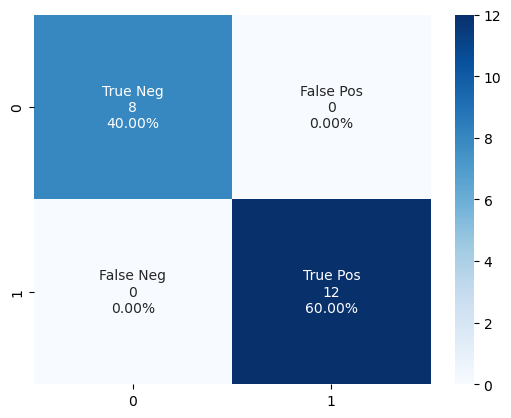

In [138]:
confusion_matrix_plt(cm_bagging)

In [139]:
ADBclf = AdaBoostClassifier()
results = cross_val_score(ADBclf, X_train, y_train, cv=_3fold)
ADBclf.fit(X_train,y_train)

AdaBoostClassifier()

In [140]:
Y_predict_aba=ADBclf.predict(X_test)
print(y_test)
print(Y_predict_aba)

93    1
67    1
6     0
64    1
96    1
83    1
98    1
42    0
25    0
15    0
77    1
9     0
71    1
97    1
34    0
75    1
82    1
23    0
59    1
45    0
Name: Label, dtype: int64
[1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 0]


In [141]:
cm_aba=confusion_matrix(y_test,Y_predict_aba)
acc_aba=accuracy_score(y_test,Y_predict_aba)
recall_aba=recall_score(y_test,Y_predict_aba)
F1_aba= f1_score(y_test,Y_predict_aba,average="micro")

In [142]:
print(f"confusion matrix :\n {cm_aba}")
print(f"accuracy: {acc_aba}")
print(f"F-measure: {F1_aba}")
print(f"Error: {1-acc_aba}")
print(f"recall: {recall_aba}")

confusion matrix :
 [[ 8  0]
 [ 0 12]]
accuracy: 1.0
F-measure: 1.0
Error: 0.0
recall: 1.0


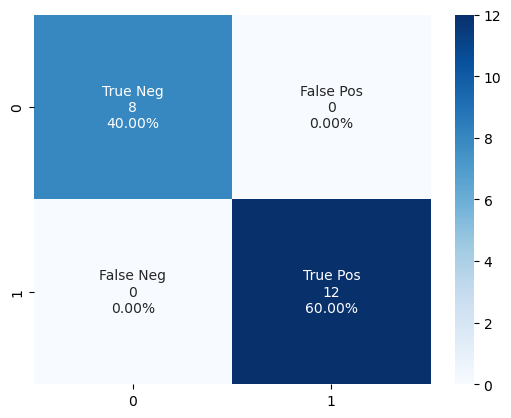

In [143]:
confusion_matrix_plt(cm_aba)